In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_df = pd.read_csv('../data/train.csv')
print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [17]:
print("Columns:",train_df.columns)

Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


### Questions worth asking from the dataset

* what do the survived passengers have in common ( specific category ) ?
* influence of class
* influence of sex
* influence of age + do children with no parch still get priority and how much ?  
* influence of sibsp , do they get more preference because its a family + parch ? or more for single individuals?
* was there a fare below which passengers didnt survive?
*  which embarkment had the most surivors ? 

### Some real life statistics that can help us drive to some questions 


37% – the percentage of passengers who survived.
* we can check the number people who survived in the dataset
* any outliers/anomalies that showcase a majority or pattern


37% – the percentage of passengers who survived.
* Find what is order of survival for each category such as Class ,children ,sex etc.
* was it easier for class 2 ticketholders to escape or was their fate similar to that of class 3.
* if survival for class 2 > class 3, how much and also find a measure to score/standardize it . 


### Interesting Insights to Look For

Were women more likely to survive?

Was survival influenced by passenger class?

Did younger passengers have better survival rates?

Did family size matter?

Any insights from cabin/deck data?

#### Data types and non-nulls

In [8]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


### Descriptions

In [12]:
print(train_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


### Count of unique values

In [11]:
print(train_df.nunique())

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


### Null values count


In [20]:
survival_percentage = train_df['Survived'].mean() * 100
print(f"Survival Rate: {survival_percentage:.2f}%")

Survival Rate: 38.38%


## Significance of each category/feature

what do the survived passengers have in common ( specific category ) ?

In [32]:
survived_df = train_df[train_df['Survived'] == 1]
print(survived_df.head())

   PassengerId  Survived  Pclass  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C  


#### Influence of Class

In [25]:
class1_df = survived_df[survived_df['Pclass'] == 1]
class2_df = survived_df[survived_df['Pclass'] == 2]
class3_df = survived_df[survived_df['Pclass'] == 3]
print(f"Class 1 survivors: {len(class1_df)}")
print(f"Class 2 survivors: {len(class2_df)}")
print(f"Class 3 survivors: {len(class3_df)}")


Class 1 survivors: 136
Class 2 survivors: 87
Class 3 survivors: 119


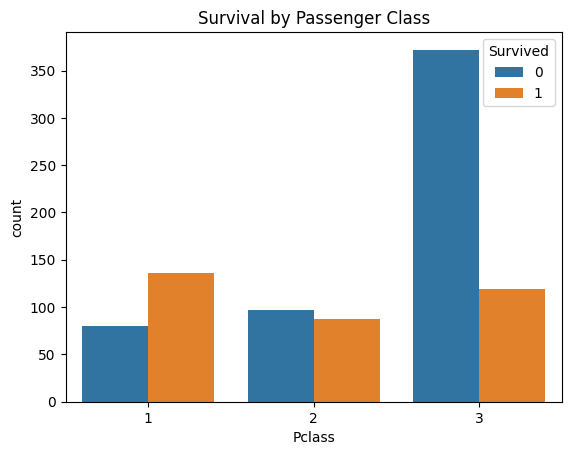

In [26]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival by Passenger Class')
plt.show()


Thus there were more survivors from 1st class ,then 3rd class and then 2nd class.
* But each of them have a different size so lets see the survival percentage for each class

In [30]:
class_counts = train_df['Pclass'].value_counts().sort_index()
class_survivors = train_df[train_df['Survived'] == 1]['Pclass'].value_counts().sort_index()

survival_percentage= (class_survivors / class_counts) * 100

# Print nicely
for pclass, rate in survival_percentage.items():
    print(f"Class {pclass}: {rate:.2f}% survived from their class")



Class 1: 62.96% survived from their class
Class 2: 47.28% survived from their class
Class 3: 24.24% survived from their class


what percentage of first class passengers survived?
* Class 1: 62.96% survived from their class

what percentage of second class passengers survived?
* Class 2: 47.28% survived from their class

what percentage of third  class passengers survived?
* Class 3: 24.24% survived from their class

#### Influence of sex

In [33]:
print(train_df.groupby('Sex')['Survived'].mean())

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


#### Influence of age + do children with no parch still get priority and how much ? 

* influence of sibsp , do they get more preference because its a family + parch ? or more for single individuals?

* was there a fare below which passengers didnt survive?

*  which embarkment had the most surivors ? 